<a href="https://colab.research.google.com/github/SaifullahMnsur/Testing_ML_using_Tensorflow_Keras/blob/main/Training_fruits_vegetables_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Data preprocessing

## Training image preprosessing


In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Computer Vision Research/Fruits_Vegetables_Recognition/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation image preprocessing


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Computer Vision Research/Fruits_Vegetables_Recognition/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 351 files belonging to 36 classes.


#Model building

In [5]:
cnn = tf.keras.models.Sequential()

##Building convolution layer

In [8]:
# cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64,64, 3]))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
# cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
# cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
# cnn.add(tf.keras.layers.Dropout(0.5)) # to avoid overfitting

cnn.add(tf.keras.layers.Dropout(0.25))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
# cnn.add(tf.keras.layers.Dense(units=256, activation='relu')) #number of neurons
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.5)) # drop neuron to avoid overfitting

In [16]:
# cnn.add(tf.keras.layers.Dense(units=36, activation='softmax')) #output layer

#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [17]:
# cnn.compile( loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [20]:
# training_history = cnn.fit(x=training_set, validation_data = validation_set, epochs=10)
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 569s 5s/step - loss: 10.2379 - accuracy: 0.0308 - val_loss: 3.5862 - val_accuracy: 0.0285
Epoch 2/32
98/98 [==============================] - 125s 1s/step - loss: 3.5867 - accuracy: 0.0244 - val_loss: 3.5792 - val_accuracy: 0.0370
Epoch 3/32
98/98 [==============================] - 116s 1s/step - loss: 3.5620 - accuracy: 0.0437 - val_loss: 3.4994 - val_accuracy: 0.0883
Epoch 4/32
98/98 [==============================] - 116s 1s/step - loss: 3.5002 - accuracy: 0.0520 - val_loss: 3.4213 - val_accuracy: 0.0826
Epoch 5/32
98/98 [==============================] - 114s 1s/step - loss: 3.3968 - accuracy: 0.0655 - val_loss: 3.3396 - val_accuracy: 0.1396
Epoch 6/32
98/98 [==============================] - 109s 1s/step - loss: 3.3222 - accuracy: 0.0770 - val_loss: 3.1639 - val_accuracy: 0.1396
Epoch 7/32
98/98 [==============================] - 122s 1s/step - loss: 3.2178 - accuracy: 0.0896 - val_loss: 2.9417 - val_accuracy: 0.1795
Epoch 8/32
9

#Evaluating Model

In [22]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 80s 746ms/step - loss: 1.0722 - accuracy: 0.7114
Training accuracy: 0.7113964557647705


In [23]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 12s 177ms/step - loss: 0.8381 - accuracy: 0.8034
Validation accuracy: 0.8034188151359558


##Saving Model

In [24]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
training_history.history # returns dictionary of history

{'loss': [10.237875938415527,
  3.58670711517334,
  3.5619771480560303,
  3.5001535415649414,
  3.39684796333313,
  3.3221797943115234,
  3.2178304195404053,
  3.136563539505005,
  3.038760185241699,
  2.9628446102142334,
  2.8790335655212402,
  2.781183958053589,
  2.7072315216064453,
  2.627715826034546,
  2.5571649074554443,
  2.5000085830688477,
  2.415818214416504,
  2.399214267730713,
  2.273860454559326,
  2.2218616008758545,
  2.1822690963745117,
  2.0771875381469727,
  2.049959182739258,
  1.929083228111267,
  1.8836363554000854,
  1.8577563762664795,
  1.8425439596176147,
  1.7403074502944946,
  1.7052947282791138,
  1.6386301517486572,
  1.6315577030181885,
  1.5385658740997314],
 'accuracy': [0.030818618834018707,
  0.024398073554039,
  0.04365970939397812,
  0.052006419748067856,
  0.06548956781625748,
  0.07704655081033707,
  0.08956661075353622,
  0.09662920981645584,
  0.1284109205007553,
  0.12969502806663513,
  0.15409310162067413,
  0.17817014455795288,
  0.191011235

##Record History

In [26]:
# import json
# with open('training_history.json', 'w') as f:
#   json.dump(training_history.history, f)

#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#Calculate Validation Accuracy

In [28]:
##Calculating accurecy achieved on validation set
print('Validations set accuracy: {}%'.format(training_history.history['val_accuracy'][-1]*100))

Validations set accuracy: 80.34188151359558%


#Accuracry visualization

##Training Visualization

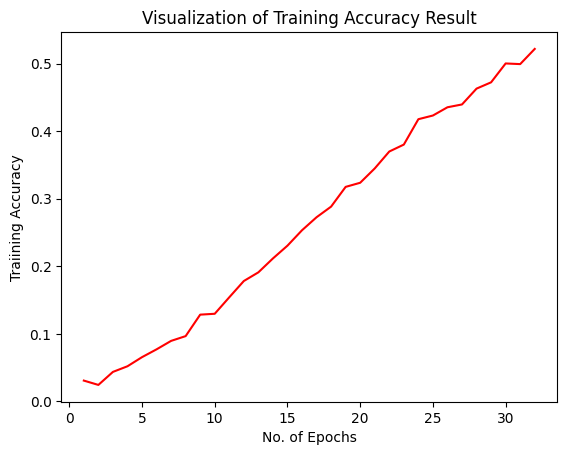

In [29]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation accuracy

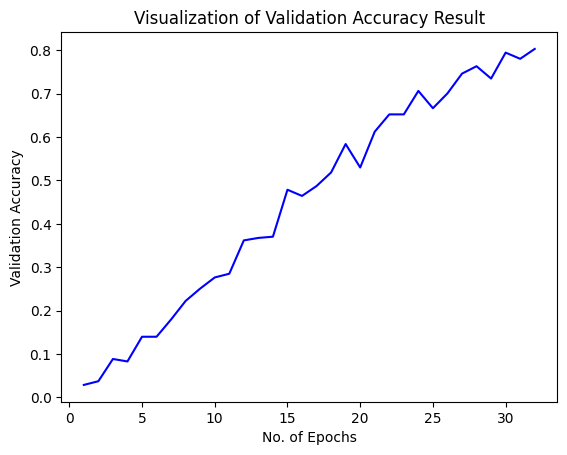

In [30]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

#Test set evaluation

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Computer Vision Research/Fruits_Vegetables_Recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [32]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 54s 988ms/step - loss: 0.8403 - accuracy: 0.7994
Test accuracy: 0.7994428873062134
